In [18]:
import pandas as pd
from datetime import datetime, timedelta, date
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
import random 
import math
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [32]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE


import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, log_loss
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost as xgb
#model selection
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

In [23]:
data = pd.read_csv('../data/raw/tel_churn_raw.csv')

In [25]:
# data.drop('Unnamed: 0',1,inplace=True)

In [26]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [29]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [31]:
data_lab = data.copy()

In [35]:
data.shape

(7043, 21)

In [37]:
data_lab = data_lab.drop_duplicates(keep='last',subset='customerID').reset_index(drop=True)

In [39]:
le = LabelEncoder()

cat_df =data_lab.select_dtypes(include=['object','category'])

for col in data_lab[cat_df.columns].columns:
    data_lab[col] = le.fit_transform(data_lab[col])

In [43]:
X = data_lab.iloc[:,:-1]
y = data_lab.iloc[:,-1]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
# building the model and fitting the data
log_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.424398
         Iterations 7


In [49]:
# printing the summary table
results = log_reg.summary()

In [85]:
LRresult = pd.DataFrame(results.tables[1])
LRresult.columns = LRresult.iloc[0]
LRresult = LRresult[1:]

In [86]:
LRresult.columns

Index([, coef, std err, z, P>|z|, [0.025, 0.975]], dtype='object', name=0)

In [87]:
LRresult

,,coef,std err,z,P>|z|,[0.025,0.975]
1,customerID,-5.028e-05,1.81e-05,-2.778,0.005,-8.58e-05,-1.48e-05
2,gender,-0.1707,0.077,-2.231,0.026,-0.321,-0.021
3,SeniorCitizen,0.1727,0.103,1.673,0.094,-0.030,0.375
4,Partner,-0.0173,0.094,-0.185,0.853,-0.201,0.166
5,Dependents,-0.2105,0.107,-1.965,0.049,-0.420,-0.000
6,tenure,-0.0325,0.003,-11.549,0.000,-0.038,-0.027
7,PhoneService,-1.2671,0.161,-7.882,0.000,-1.582,-0.952
8,MultipleLines,0.0722,0.049,1.465,0.143,-0.024,0.169
9,InternetService,0.2397,0.077,3.124,0.002,0.089,0.390
10,OnlineSecurity,-0.3006,0.050,-6.058,0.000,-0.398,-0.203


In [90]:
#considering columns who has pvalue less than equal to 0.05 
columns_set1 = ['gender','Dependents','tenure','PhoneService','InternetService','OnlineSecurity','OnlineBackup','TechSupport'
               ,'Contract','PaperlessBilling','MonthlyCharges','TotalCharges']

In [92]:
X_feat = X[columns_set1]
y = data_lab.iloc[:,-1]

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.33, random_state=42)

In [95]:
log_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.426320
         Iterations 7


In [98]:
yhat = log_reg.predict(X_test)
prediction = list(map(round, yhat))
  
# comparing original and predicted values of y
# print('Actual values', list(y_test.values))
# print('Predictions :', prediction)

In [102]:
cm = confusion_matrix(y_test, prediction) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', roc_auc_score(y_test, prediction))

Confusion Matrix : 
 [[1497  200]
 [ 261  367]]
Test accuracy =  0.7332699330778556


In [103]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1697
           1       0.65      0.58      0.61       628

    accuracy                           0.80      2325
   macro avg       0.75      0.73      0.74      2325
weighted avg       0.80      0.80      0.80      2325



In [ ]:
#using RFE

In [114]:
data_lab.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [184]:
X = data_lab.iloc[:,:-1]
y = data_lab.iloc[:,-1]

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X.drop('customerID',1), y, test_size=0.33, random_state=42)

In [186]:
len(columns_set1)

12

In [187]:
classifier= RandomForestClassifier(n_estimators=100, max_depth=10)

In [188]:
n_features_to_select = 9
rfe = RFE(classifier, n_features_to_select = n_features_to_select)
rfe.fit(X.drop('customerID',1), y)

RFE(estimator=RandomForestClassifier(max_depth=10), n_features_to_select=9)

In [189]:
from operator import itemgetter
features = X.drop('customerID',1).columns.to_list()
for x, w,z in (sorted(zip(rfe.support_,rfe.ranking_ , features), key=itemgetter(0))):
    print(x,'__Rank',w,  '__' ,z)

False __Rank 5 __ gender
False __Rank 7 __ SeniorCitizen
False __Rank 10 __ Partner
False __Rank 6 __ Dependents
False __Rank 11 __ PhoneService
False __Rank 4 __ MultipleLines
False __Rank 3 __ DeviceProtection
False __Rank 8 __ StreamingTV
False __Rank 9 __ StreamingMovies
False __Rank 2 __ PaperlessBilling
True __Rank 1 __ tenure
True __Rank 1 __ InternetService
True __Rank 1 __ OnlineSecurity
True __Rank 1 __ OnlineBackup
True __Rank 1 __ TechSupport
True __Rank 1 __ Contract
True __Rank 1 __ PaymentMethod
True __Rank 1 __ MonthlyCharges
True __Rank 1 __ TotalCharges


In [190]:
Feature_importance_DF = pd.DataFrame(zip(rfe.support_,rfe.ranking_ ,features),columns=['Support','Rank','Columns'])

In [191]:
Important_Features = Feature_importance_DF[Feature_importance_DF['Rank']==1]['Columns'].to_list()

<AxesSubplot:>

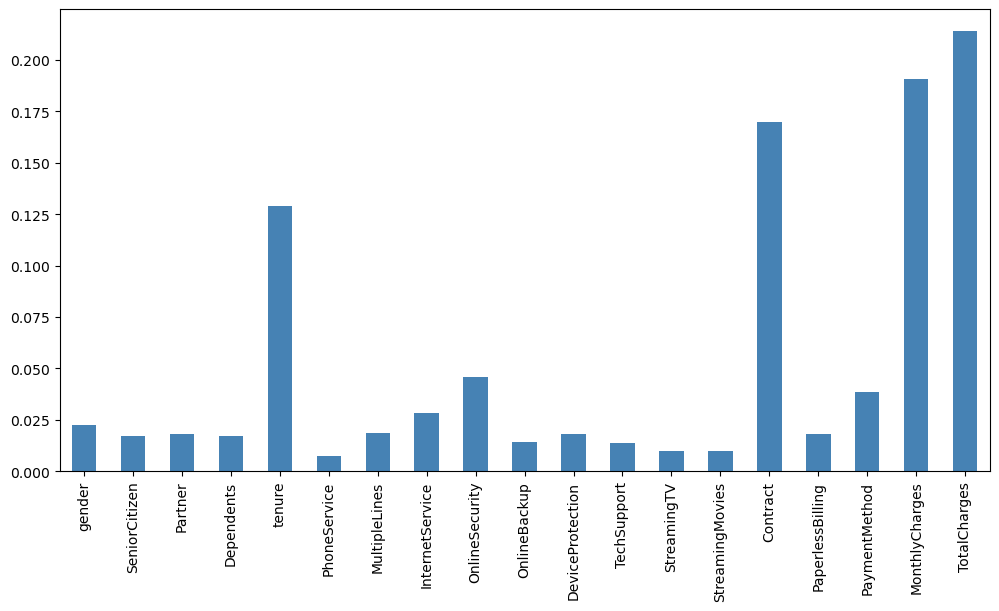

In [192]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X.drop('customerID',1), y)

pd.Series(clf.feature_importances_, index=X.drop('customerID',1).columns[:]).plot.bar(color='steelblue', figsize=(12, 6))

In [193]:
df_featured = data_lab[Important_Features]

In [194]:
X = df_featured
y = data_lab['Churn']

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [196]:
#Modelling

In [197]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB()]

In [198]:
#Logging for visual comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

In [199]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("AUC ROC Score: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)


LogisticRegression
****Results****
AUC ROC Score: 79.6129%
Log Loss: 0.42018027680440534
KNeighborsClassifier
****Results****
AUC ROC Score: 73.7634%
Log Loss: 3.3748361672531524
SVC
****Results****
AUC ROC Score: 72.9892%
Log Loss: 0.5214808548047971
DecisionTreeClassifier
****Results****
AUC ROC Score: 74.0645%
Log Loss: 8.802259230982424
RandomForestClassifier
****Results****
AUC ROC Score: 78.8387%
Log Loss: 0.5525183411452316
XGBClassifier
****Results****
AUC ROC Score: 79.5269%
Log Loss: 0.4317217130113959
AdaBoostClassifier
****Results****
AUC ROC Score: 80.0000%
Log Loss: 0.6766330691278125
GradientBoostingClassifier
****Results****
AUC ROC Score: 80.2151%
Log Loss: 0.4060125102751867
GaussianNB
****Results****
AUC ROC Score: 75.7419%
Log Loss: 0.6358716309040007


In [200]:
log1 = log.sort_values(by='Accuracy',ascending=False)
log2 = log.sort_values(by='Log Loss')

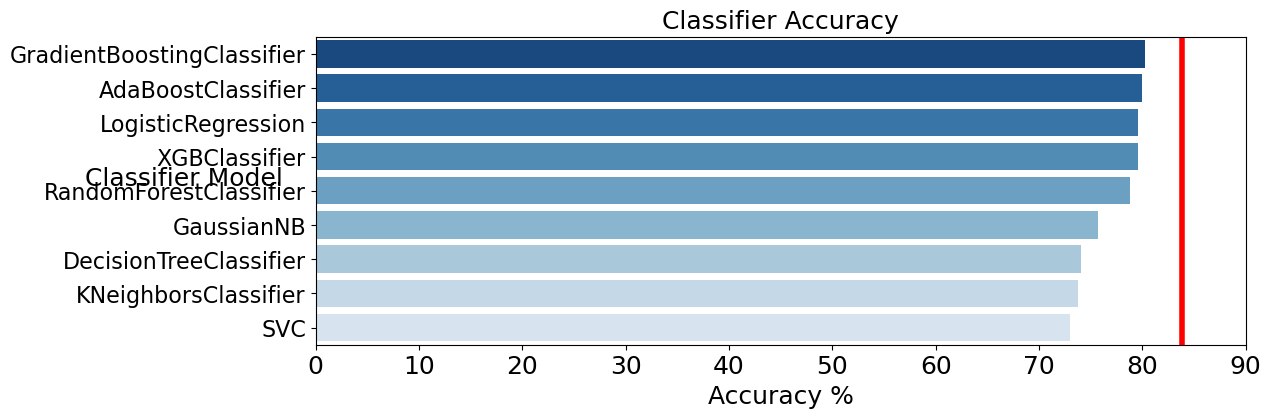

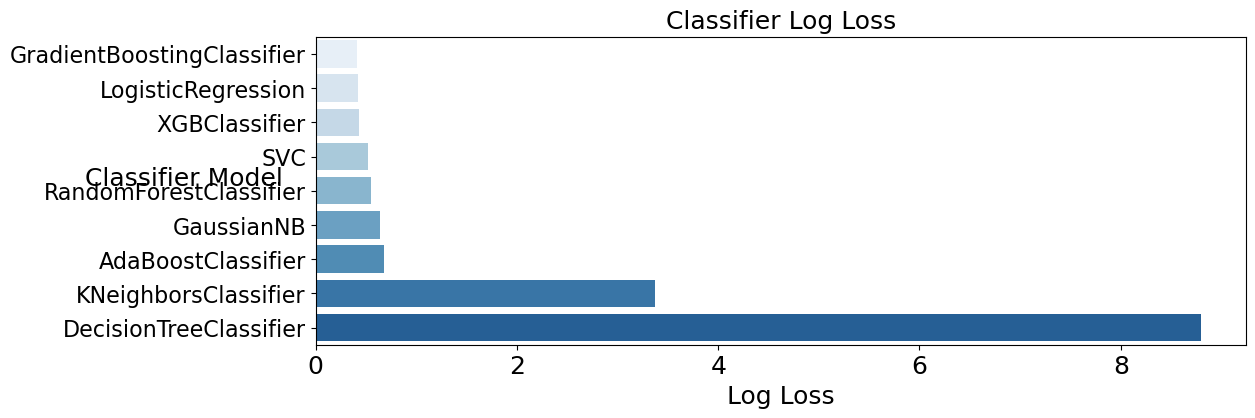

In [201]:
plt.figure(figsize=(12,4))
fig = sns.barplot(x='Accuracy', y='Classifier', data=log1, palette=sns.color_palette("Blues_r", n_colors=len('classifier')))
plt.xlabel('Accuracy %', fontsize=18)
plt.ylabel('Classifier Model',fontsize=18, position=(0,1),rotation=0)
fig.yaxis.labelpad= -125
fig.set_xticks(ticks=[0,10,20,30,40,50,60,70,80,90])
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Classifier Accuracy', fontsize=18)
plt.axvline(83.8, 0,1, lw=4, color='red')
# plt.annotate(s='Baseline:83.8%', xy=(75,-0.5), fontsize=16, color='black')
plt.show()
plt.figure(figsize=(12,4))
fig = sns.barplot(x='Log Loss', y='Classifier', data=log2, palette=sns.color_palette("Blues", n_colors=len('Classifier')))
plt.xlabel('Log Loss', fontsize=18)
plt.ylabel('Classifier Model',fontsize=18, position=(0,1),rotation=0)
fig.yaxis.labelpad= -125
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Classifier Log Loss', fontsize=18)
plt.show()

In [202]:
#hyperparameter tunning

In [203]:
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [100,200,500],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'max_features': 'sqrt', 'n_estimators': 100}


In [204]:
#Selecting tunned hyperparameter
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'log2' ,n_estimators=100, oob_score = True,class_weight='balanced') 

In [205]:
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2', n_jobs=-1,
                       oob_score=True)

In [206]:
rfc_y_pred = rfc.predict(X_test)

In [207]:
print(confusion_matrix(rfc_y_pred,y_test))

[[1522  324]
 [ 175  304]]


In [208]:
print(classification_report(rfc_y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1846
           1       0.48      0.63      0.55       479

    accuracy                           0.79      2325
   macro avg       0.69      0.73      0.70      2325
weighted avg       0.81      0.79      0.80      2325



In [232]:
dictt = {'Fiber optic':0, 'DSL':1, 'No':2}


In [237]:
X_test.columns

Index(['tenure', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'TechSupport', 'Contract', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')

In [243]:
data[X_test.columns]['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [210]:
#Selecting tunned hyperparameter
lr = LogisticRegression(class_weight='balanced') 

In [211]:
lr.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [212]:
lr_y_pred = lr.predict(X_test)

In [213]:
print(confusion_matrix(lr_y_pred,y_test))

[[1209  112]
 [ 488  516]]


In [214]:
print(classification_report(lr_y_pred,y_test))

              precision    recall  f1-score   support

           0       0.71      0.92      0.80      1321
           1       0.82      0.51      0.63      1004

    accuracy                           0.74      2325
   macro avg       0.77      0.71      0.72      2325
weighted avg       0.76      0.74      0.73      2325



In [216]:
#Linear Model Logistic Regression has working better than any Tree Based Model
import joblib

In [217]:
filename = 'finalized_model.sav'
joblib.dump(lr, filename)

['finalized_model.sav']

In [179]:
#Model Explainalibility 

In [219]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
from explainerdashboard.datasets import titanic_survive, feature_descriptions



explainer = ClassifierExplainer(lr, X_test, y_test, 
                               labels=['Not Churned', 'Churned'])

ExplainerDashboard(explainer).run()

Note: model_output='probability' is currently not supported for linear classifiers models with shap. So defaulting to model_output='logodds' If you really need probability outputs use shap='kernel' instead.
Note: shap values for shap='linear' get calculated against X_background, but paramater X_background=None, so using X instead...
Generating self.shap_explainer = shap.LinearExplainer(model, X)...
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Ca

 * Running on all addresses.
 * Running on http://192.168.0.193:8050/ (Press CTRL+C to quit)
192.168.0.193 - - [20/Apr/2023 13:59:48] "GET / HTTP/1.1" 200 -
192.168.0.193 - - [20/Apr/2023 13:59:49] "GET /_dash-layout HTTP/1.1" 200 -
192.168.0.193 - - [20/Apr/2023 13:59:49] "GET /_dash-dependencies HTTP/1.1" 200 -
192.168.0.193 - - [20/Apr/2023 13:59:49] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -
192.168.0.193 - - [20/Apr/2023 13:59:49] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
192.168.0.193 - - [20/Apr/2023 13:59:49] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
192.168.0.193 - - [20/Apr/2023 13:59:49] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.193 - - [20/Apr/2023 13:59:49] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.193 - - [20/Apr/2023 13:59:49] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.193 - - [20/Apr/2023 13:59:49] "POST /_dash-update-component HTTP/1.1" 200 -
1